# Data Exploration

In [327]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import json
from ast import literal_eval
import random

## Import Dataset

In [2]:
ratings = pd.read_csv("./database/merged/full/ratings.csv")
metadatas = pd.read_csv("./database/merged/metadatas.csv")
movie_ratings = pd.read_csv("./database/merged/global_ratings.csv")
movies = pd.merge(metadatas, movie_ratings, on="MovieID")

Movies: Metatdatas and Global Rating

In [3]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87585 entries, 0 to 87584
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MovieID          87585 non-null  int64  
 1   Title            87585 non-null  object 
 2   Runtime          87530 non-null  object 
 3   ReleaseDate      87577 non-null  object 
 4   Genres           87585 non-null  object 
 5   Directors        87585 non-null  object 
 6   Cast             87585 non-null  object 
 7   OriginCountries  87585 non-null  object 
 8   Languages        87585 non-null  object 
 9   Plot             87389 non-null  object 
 10  AverageRating    87585 non-null  float64
 11  VoteCount        87585 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 8.0+ MB


Ratings dataset: User - Movie - Rating

In [4]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32000204 entries, 0 to 32000203
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   UserID   int64  
 1   MovieID  int64  
 2   Rating   float64
dtypes: float64(1), int64(2)
memory usage: 732.4 MB


Reformat columns

In [5]:
movies["ReleaseDate"] = pd.to_datetime(movies["ReleaseDate"])
movies["Runtime"] = pd.to_timedelta(movies["Runtime"])
movies["Runtime"] = movies["Runtime"] / pd.Timedelta(hours=1)
movies["Genres"] = movies["Genres"].apply(lambda x: literal_eval(x))
movies["Directors"] = movies["Directors"].apply(lambda x: literal_eval(x))
movies["Cast"] = movies["Cast"].apply(lambda x: literal_eval(x))
movies["OriginCountries"] = movies["OriginCountries"].apply(lambda x: literal_eval(x))

## Data Analysis

### A. On Movies Dataset

#### Release date

count                            87577
mean     1995-12-20 07:31:42.787261568
min                1874-12-09 00:00:00
25%                1981-08-28 00:00:00
50%                2006-03-09 00:00:00
75%                2015-09-30 00:00:00
max                2024-11-20 00:00:00
Name: ReleaseDate, dtype: object


<Axes: >

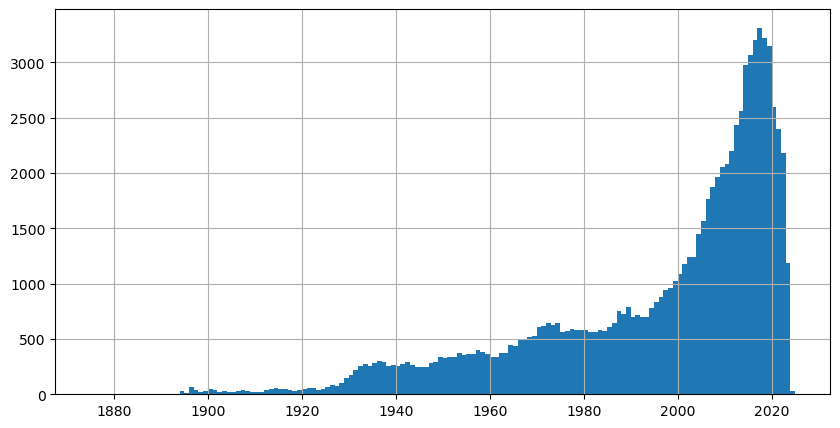

In [5]:
print(movies["ReleaseDate"].describe())
movies["ReleaseDate"].hist(bins=(2024 - 1874), figsize=(10, 5))

Top-10 most recent movies

In [6]:
movies.nlargest(10, ["ReleaseDate"])[["MovieID", "Title", "ReleaseDate"]]

,MovieID,Title,ReleaseDate
59113,198149,Wicked,2024-11-20
85760,286495,Starring Jerry As Himself (2023),2024-11-06
85088,283733,Haulout (2022),2024-10-03
70135,225715,Addiction,2024-09-20
86142,287645,Hidden Letters (2022),2024-08-31
84553,282433,Rock & Roll Revival,2024-06-28
83518,279808,The Grab (2022),2024-06-14
85800,286649,I Used to Be Funny (2023),2024-06-07
86602,289111,Queens (2022),2024-05-15
83231,279064,Self-Portrait As A Coffee Pot (2022),2024-04-17


#### Runtime

count    87530.000000
mean         1.530695
std          0.542618
min          0.000000
25%          1.383333
50%          1.550000
75%          1.750000
max         14.000000
Name: Runtime, dtype: float64


<Axes: >

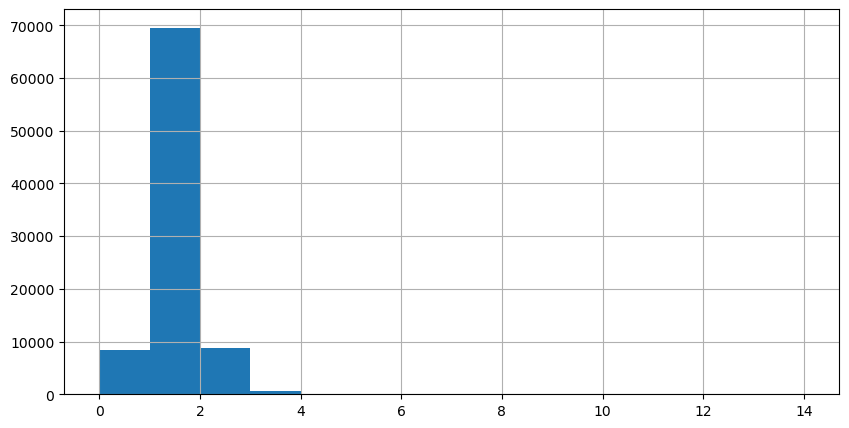

In [7]:
print(movies["Runtime"].describe())
movies["Runtime"].hist(bins=(14), figsize=(10, 5))

Top-10 movies in length (how are there movies that reach 14h of runtime)

In [8]:
movies.nlargest(10, ["Runtime"])[["MovieID", "Title", "Runtime"]]

,MovieID,Title,Runtime
50288,179467,The Reality of Me (2012),14.000000
67343,217137,Women Make Film: A New Road Movie Through Cine...,14.000000
76891,254803,Music with Roots in the Aether: Opera for Tele...,14.000000
60098,200286,The Flower (2019),13.466667
25426,123621,Space (1985),13.000000
54027,187263,Out 1 (1971),12.933333
59578,199129,The Blues (2003),12.833333
47882,174375,Hollywood (1980),11.266667
53539,186269,Mikhaylo Lomonosov (1986),11.050000
64717,210993,Evolution of a Filipino Family (2004),10.416667


#### Average Rating and Vote Count

array([[<Axes: title={'center': 'AverageRating'}>,
        <Axes: title={'center': 'VoteCount'}>]], dtype=object)

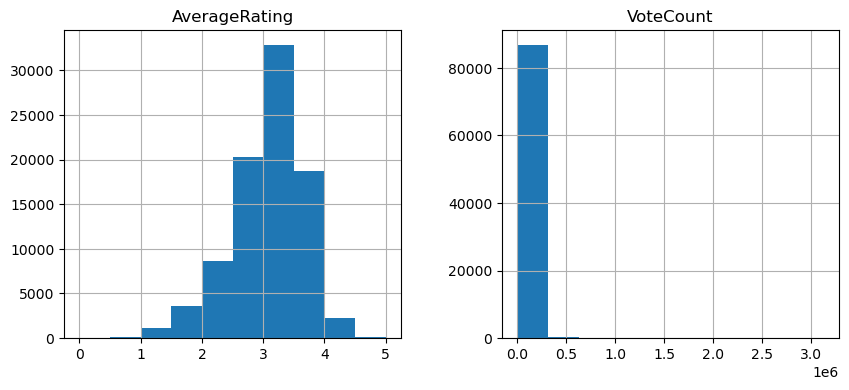

In [418]:
movies.hist(column=["AverageRating", "VoteCount"], figsize=(10, 4))

Top-5 movies in rating

In [5]:
movies.nlargest(5, ["AverageRating"])[["MovieID", "Title", "AverageRating", "VoteCount"]]

,MovieID,Title,AverageRating,VoteCount
49699,178157,BlueGreen,5.0,1.0
50809,180549,Le mystère de Fatima (2017),5.0,2.0
52291,183647,11 September Vragen (2016),5.0,2.0
56190,191973,Tamale Road: A Memoir from El Salvador (2012),5.0,1.0
67487,217531,Deconstructing the Beatles' Abbey Road: Side One,5.0,1.0


Top-5 movies in vote

In [17]:
movies.nlargest(5, ["VoteCount"])[["MovieID", "Title", "AverageRating", "VoteCount"]]

,MovieID,Title,AverageRating,VoteCount
314,318,"Shawshank Redemption, The (1994)",4.639923,3130026.0
12223,58559,"Dark Knight, The (2008)",4.491602,2992176.0
14939,79132,Inception (2010),4.393153,2694450.0
2867,2959,Fight Club (1999),4.393513,2506681.0
351,356,Forrest Gump (1994),4.384807,2427701.0


#### Genres

In [168]:
movies_genres = (movies[["MovieID", "Genres"]]
 .explode(column="Genres")
 .groupby("Genres")
 .count().drop("(no genres listed)")
 .sort_values(by="MovieID", ascending=True))

array([<Axes: ylabel='MovieID'>], dtype=object)

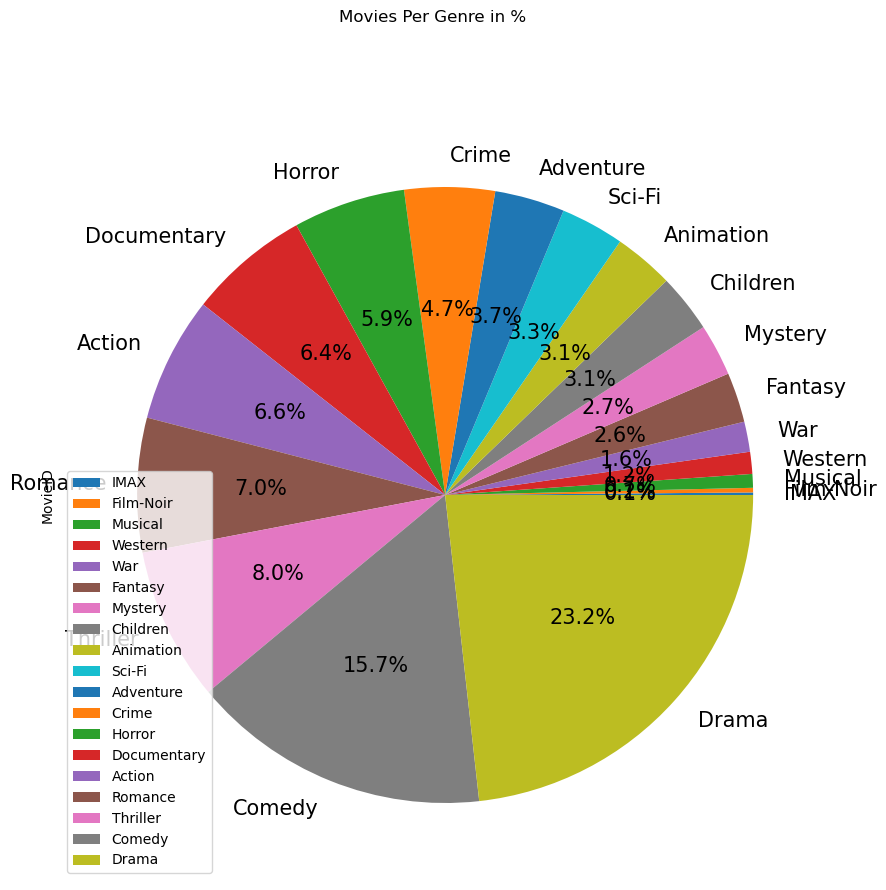

In [169]:
movies_genres.plot.pie(
	title="Movies Per Genre in %",
	figsize=(10, 10),
	autopct="%1.1f%%",
	fontsize=15,
	subplots=True,
)

<Axes: title={'center': 'Movies per Genre'}, ylabel='Genres'>

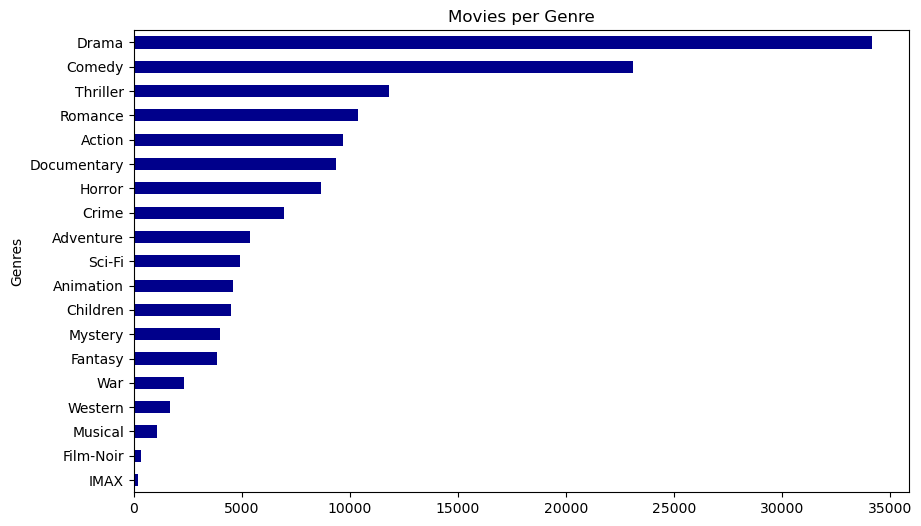

In [170]:
movies_genres["MovieID"].plot.barh(
	title="Movies per Genre", color="DarkBlue", figsize=(10, 6)
)

#### Directors

In [177]:
movie_directors = (movies[["MovieID", "Directors"]]
.explode(column="Directors")
.groupby("Directors")
.count()
.sort_values(by="MovieID", ascending=False)
)

In [178]:
movie_directors.head(10)

,MovieID
Directors,
Georges Méliès,118
Friz Freleng,111
Chuck Jones,110
Tex Avery,90
Michael Curtiz,85
Jean-Luc Godard,75
John Ford,73
Richard Thorpe,68
Jack Hannah,65


In [179]:
movie_directors.tail(10)

,MovieID
Directors,
Leon Bashir,1
Leo Zhang,1
David A. Armstrong,1
Leo Scott,1
Leo Scherman,1
Leo Salkin,1
David A. Oster,1
Leo Milano,1
Leo Medel,1


#### Cast

In [180]:
movie_cast = (movies[["MovieID", "Cast"]]
.explode(column="Cast")
.groupby("Cast")
.count()
.sort_values(by="MovieID", ascending=False)
)

In [181]:
movie_cast.head(10)

,MovieID
Cast,
Bess Flowers,506
Mel Blanc,310
Frank Welker,254
Sam Harris,250
William H. O'Brien,218
Harold Miller,215
Eric Roberts,213
Christopher Lee,209
Irving Bacon,206


In [182]:
movie_cast.tail(10)

,MovieID
Cast,
Jaime Ruiz Peñas,1
Jaime Roman,1
Jaime Rogers,1
Jaime Rodríguez,1
Jaime Robinson,1
Jaime Robertson,1
Jaime Rivas,1
Jaime Reichner,1
Jaime Ray Soto,1


### B. On Rating Dataset

In [6]:
def print_data_count(ratings: pd.DataFrame):
	s = ["user", "movie"]
	p = ["rated from", "are rated by"]
	for i, t in enumerate(["UserID", "MovieID"]):
		group = ratings[[t, "Rating"]].groupby([t])
		movie_count = group.count().values
		print(f"There are {len(group)} {s[i]}s in the dataset")
		print(f"Each {s[i]} {p[i]} {movie_count.min()}-{movie_count.max()} {s[1-i]}s.")

In [7]:
print_data_count(ratings)

There are 200948 users in the dataset
Each user rated from 20-33332 movies.
There are 84432 movies in the dataset
Each movie are rated by 1-102929 users.


In [8]:
group_rating = ratings[["UserID", "Rating"]].groupby(["UserID"])
most_rating = group_rating.count().sort_values(by="Rating", ascending=False).iloc[0]
benchmark_user = int(most_rating.name)
benchmark_rating_count = int(most_rating.values[0])
print(f"User {benchmark_user} rated {benchmark_rating_count} movies ({benchmark_rating_count / len(movies) :.2%} of all movies)")

User 175325 rated 33332 movies (38.06% of all movies)


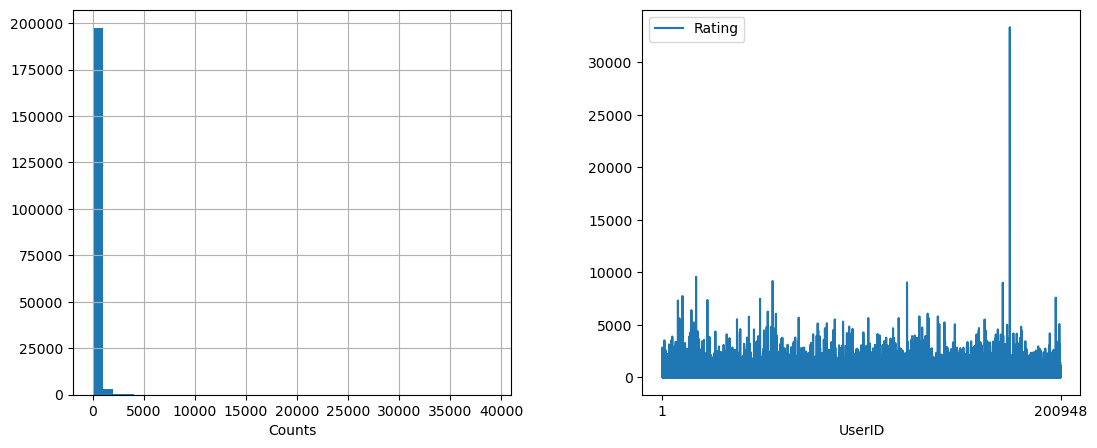

In [417]:
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
group_rating.count().hist(ax=ax[0], bins=np.arange(0, 40000, 1000))
ax[0].set_title("")
ax[0].set_xlabel("Counts")
group_rating.count().plot(ax=ax[1])
ax[1].set_xticks([ratings["UserID"].min(), ratings["UserID"].max()])
plt.show()

## Feature Selection

### A. Rating and Vote count

IMDb "inspired" Weighted rating

$$\text{Weighted Rating} = \left( \frac{v}{v + c} \right).R +\left( \frac{c}{v + c} \right).\bar{R}$$
With:
- *R* : Movie's average rating 
- *v* : Movie's vote count
- *c* : n-th percentile of vote count


In [348]:
def weight_by_vote_percentile(p: float, normalize=True):
	R_bar = movies["AverageRating"].mean()
	c = movies["VoteCount"].quantile(p)
	def weighted_rating(row):
		R = row["AverageRating"]
		v = row["VoteCount"]
		return Series(
			[row["MovieID"], row["Title"], (v * R + c * R_bar) / (v + c)],
			index=["MovieID", "Title", "Weighted Average"],
		)
	weighted = movies.apply(weighted_rating, axis=1)
	weighted_max = weighted["Weighted Average"].max()
	weighted_min = weighted["Weighted Average"].min()
	weighted_range = weighted_max - weighted_min
	def normalized_rating(row):
		r = row["Weighted Average"]
		r = (r - weighted_min) / weighted_range
		return Series(
			[row["MovieID"], row["Title"], r],
			index=["MovieID", "Title", f"WeightedRating"],
		)
	if normalize:
		weighted = weighted.apply(normalized_rating, axis=1)
	print("Done")
	return weighted

Select candidate percentile

In [ ]:
weighted_75th = weight_by_vote_percentile(0.75)
weighted_95th = weight_by_vote_percentile(0.95)
weighted_99th = weight_by_vote_percentile(0.99)
weighted_99_9th = weight_by_vote_percentile(0.999)
weighted_99_99th = weight_by_vote_percentile(0.9999)

In [405]:
weighted_99th.nlargest(10, ["WeightedRating"])

,MovieID,Title,WeightedRating
314,318,"Shawshank Redemption, The (1994)",1.000000
840,858,"Godfather, The (1972)",0.959198
12223,58559,"Dark Knight, The (2008)",0.938105
7029,7153,"Lord of the Rings: The Return of the King, The...",0.915609
292,296,Pulp Fiction (1994),0.906160
4888,4993,"Lord of the Rings: The Fellowship of the Ring,...",0.899711
522,527,Schindler's List (1993),0.896804
14939,79132,Inception (2010),0.893695
1190,1221,"Godfather: Part II, The (1974)",0.891787
2867,2959,Fight Club (1999),0.890223


Merge all ratings

In [354]:
def merged_rating_by_movie(df, *dataframes):
	main_df = df
	for df in dataframes:
		main_df = pd.merge(main_df, df, on="MovieID", how="left")
	return main_df

def get_ratings_by_user(user_id, ratings, dataframe):
    user_rated = ratings[ratings["UserID"] == user_id]
    entries = pd.merge(user_rated, dataframe, on="MovieID", how="left")
    return entries

merged_ratings = merged_rating_by_movie(
	movies[["MovieID", "AverageRating"]].rename({"AverageRating": "Avg"}, axis=1),
	weighted_75th[["MovieID", "WeightedRating"]].rename({"WeightedRating": "75th"}, axis=1),
	weighted_95th[["MovieID", "WeightedRating"]].rename({"WeightedRating": "95th"}, axis=1),
	weighted_99th[["MovieID", "WeightedRating"]].rename({"WeightedRating": "99th"}, axis=1),
	weighted_99_9th[["MovieID", "WeightedRating"]].rename({"WeightedRating": "99.9th"}, axis=1),
	weighted_99_99th[["MovieID", "WeightedRating"]].rename({"WeightedRating": "99.99th"}, axis=1),
)

Calculate correlation

In [356]:
all_user = ratings["UserID"].unique()
n_percentile = ["Avg", "75th", "95th", "99th", "99.9th", "99.99th"]

corr_avg =[]
corr_75th =[]
corr_95th =[]
corr_99th =[]
corr_99_9th =[]
corr_99_99th =[]

np.seterr(invalid="ignore")
# Pearson correlation
for num, u in enumerate(all_user):
    print(num + 1, "/", len(all_user), end="\r")
    user_df = get_ratings_by_user(u, ratings, merged_ratings)
    corr_avg.append(user_df["Rating"].corr(user_df["Avg"]))
    corr_75th.append(user_df["Rating"].corr(user_df["75th"]))
    corr_95th.append(user_df["Rating"].corr(user_df["95th"]))
    corr_99th.append(user_df["Rating"].corr(user_df["99th"]))
    corr_99_9th.append(user_df["Rating"].corr(user_df["99.9th"]))
    corr_99_99th.append(user_df["Rating"].corr(user_df["99.99th"]))

# Save correlation statistic
pd.DataFrame({
    "UserID": all_user,
    "Avg": corr_avg,
    "75th": corr_75th,
    "95th": corr_95th,
    "99th": corr_99th,
    "99.9th": corr_99_9th,
    "99.99th": corr_99_99th,
}).to_csv("./notebooks/data-exploration/rating_correlation.csv", index=False)

Compare different rating

In [357]:
corr_stat = pd.read_csv("./notebooks/data-exploration/rating_correlation.csv").fillna(0.0)

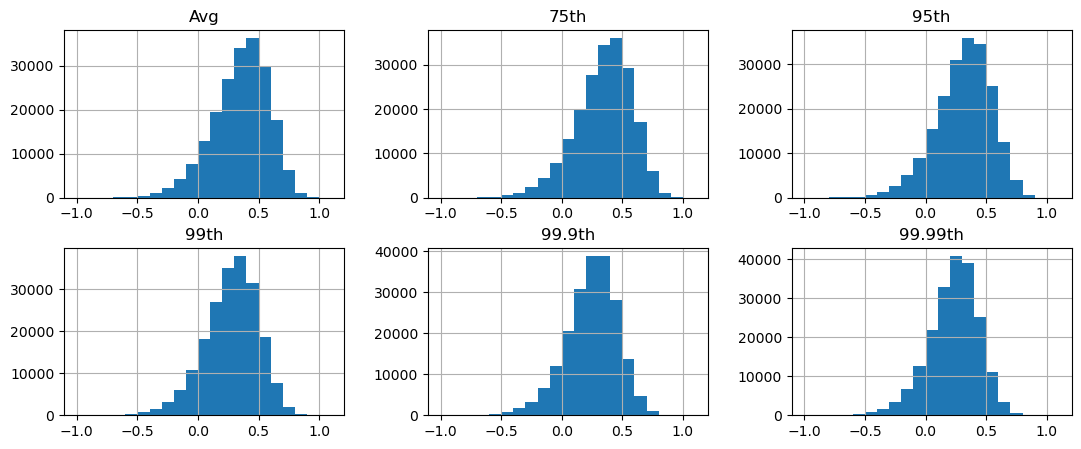

In [393]:
corr_stat.drop(columns=["UserID"]).hist(figsize=(13, 5), layout=(2, 3), bins=np.arange(-1, 1.2, 0.1))
plt.show()

### B. Text Features

Extracted using TF-IDF Vectorizer (See in [cb notebook](./notebooks/training/cb_models.ipynb))

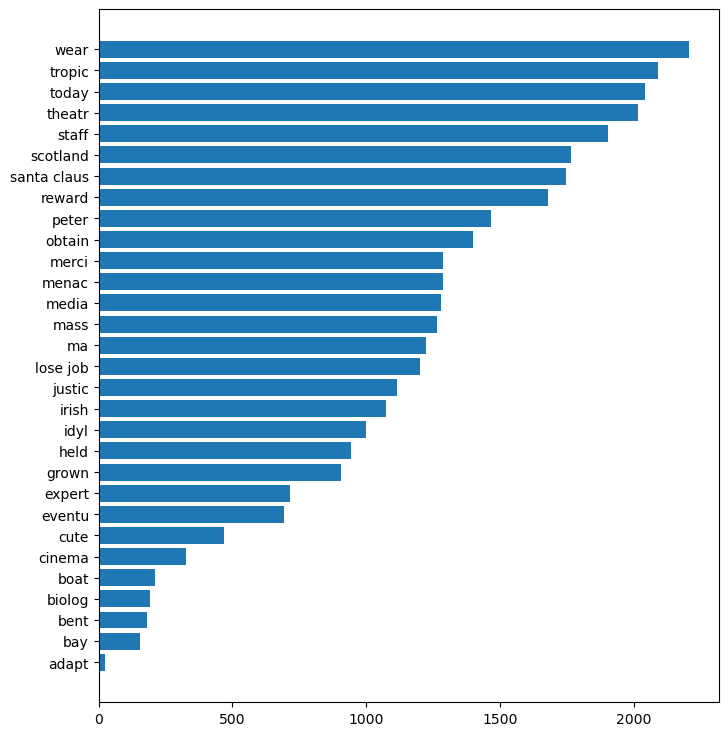

In [373]:
random.seed(1021)
# Filtered with min_df = 0.005, max_df = 1.0
with open("./models/cb/vocab.json", "r") as data:
    kw_dict: dict = json.load(data)
# Sample some kewords
sampled_kw = random.choices(list(kw_dict.items()), k=30)
sorted_kw = sorted(sampled_kw, key=lambda x: x[1])
# Show
kw, kw_count = zip(*sorted_kw)
plt.figure(figsize=(8, 9))
plt.barh(kw, kw_count)
plt.show()

In [450]:
from nltk.stem.snowball import EnglishStemmer
import json
import re

class KewwordsHighlighter:
    def __init__(self, kw_path):
        self.stemmer = EnglishStemmer()
        with open(kw_path, "r") as data:
            self.kw_dict: dict = json.load(data)
        self.inv_stem = dict()

    def __call__(self, text: str):
        text = re.sub("[^A-Za-z ]+", "", text)
        stemmed_words = []
        for word in text.split(" "):
            stemmed = self.stemmer.stem(word)
            self.inv_stem[stemmed] = word
            stemmed_words.append(stemmed)
        stemmed_text = " ".join(stemmed_words)
        for kw in self.kw_dict:
            # inv_kw = 
            stemmed_text = stemmed_text.replace(kw, "0")
        return stemmed_text

In [451]:
hl = KewwordsHighlighter("./models/cb/vocab.json")

In [442]:
m_plot = movies["Plot"].iloc[0]
hl(m_plot)

'a 0 0 is 0 00 and 0 wh0 a new space0n action figur sup0 h0 as top 0 in a boy 0room'

In [452]:
m_plot = movies["Plot"].iloc[0]
hl(m_plot)

'a 0 0 is 0 00 and 0 wh0 a new space0n action figur sup0 h0 as top 0 in a boy 0room'

In [453]:
hl.inv_stem

{'a': 'a',
 'cowboy': 'cowboy',
 'doll': 'doll',
 'is': 'is',
 'profound': 'profoundly',
 'threaten': 'threatened',
 'and': 'and',
 'jealous': 'jealous',
 'when': 'when',
 'new': 'new',
 'spaceman': 'spaceman',
 'action': 'action',
 'figur': 'figure',
 'supplant': 'supplants',
 'him': 'him',
 'as': 'as',
 'top': 'top',
 'toy': 'toy',
 'in': 'in',
 'boy': 'boys',
 'bedroom': 'bedroom'}

In [426]:
stemmed_text = []


In [429]:
[(t in kw_dict) for t in stemmed_text]

[False,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False]